<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-1-/blob/main/Stats_by_Python4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probability density functions
>* Continuous Prob. Distr.
>* Cumulative Density Functions

(array([1.07918458e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.07918458e-05, 0.00000000e+00,
        1.07918458e-05, 2.15836916e-05, 2.15836916e-05, 2.15836916e-05,
        7.55429206e-05, 1.29502150e-04, 7.55429206e-05, 1.72669533e-04,
        2.05045070e-04, 2.05045070e-04, 3.34547220e-04, 6.36718902e-04,
        6.58302594e-04, 9.38890585e-04, 1.19789488e-03, 1.17631119e-03,
        1.76986271e-03, 2.28787131e-03, 2.84904729e-03, 3.41022327e-03,
        4.07931771e-03, 5.12612676e-03, 6.08660103e-03, 7.04707531e-03,
        8.52555818e-03, 9.66949384e-03, 1.18926141e-02, 1.29394231e-02,
        1.60258910e-02, 1.71806185e-02, 1.88101872e-02, 2.16700264e-02,
        2.35585994e-02, 2.61378505e-02, 2.77890029e-02, 3.01847927e-02,
        3.29043379e-02, 3.40051061e-02, 3.53972542e-02, 3.65411899e-02,
        3.93254861e-02, 3.94334046e-02, 3.97355762e-02, 3.96924089e-02,
        3.92283595e-02, 3.93039024e-02, 3.80844238e-02, 3.737216

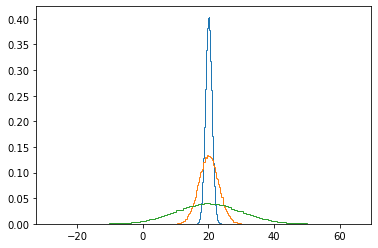

In [2]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms

plt.hist(samples_std1, bins=100, histtype='step', density=True)
plt.hist(samples_std3, bins=100, histtype='step', density=True)
plt.hist(samples_std10, bins=100, histtype='step', density=True)


In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

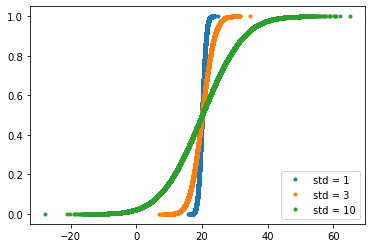

In [4]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3 , marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

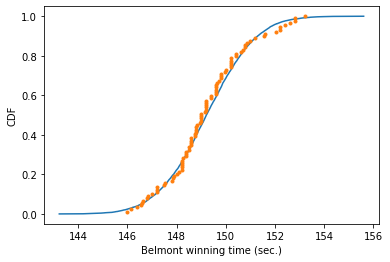

In [23]:
import pandas as pd
#Load a csv file to the colab
file_path = r'/content/drive/MyDrive/datasets/belmont_no_outliers.csv'
belmont_no_outliers = np.loadtxt(fname=file_path, delimiter=',')

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size= 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

In [21]:
!mv /content/belmont_no_outliers.csv /content/drive/MyDrive/datasets

In [5]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

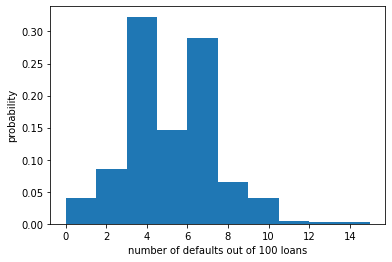

In [6]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

weights = np.ones_like(n_defaults) / float(len(n_defaults))
# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, weights=weights)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

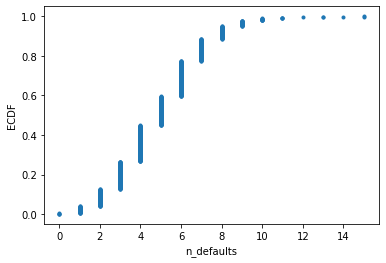

In [8]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
# Generate plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

# Label the axes

plt.xlabel('n_defaults')
plt.ylabel('ECDF')

# Show the plot
plt.show()


In [9]:
# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults>=10) 
 
# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

Probability of losing money = 0.022


#Binomial Distribution
>* Probability mass function PMF 
>* Binomial CDF


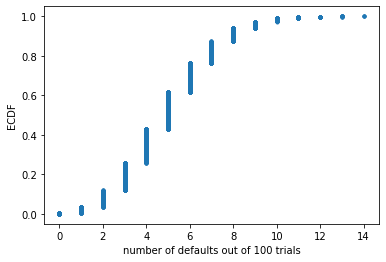

In [10]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle = 'none')

plt.xlabel('number of defaults out of 100 trials')
plt.ylabel('ECDF')

# Show the plot

plt.show()

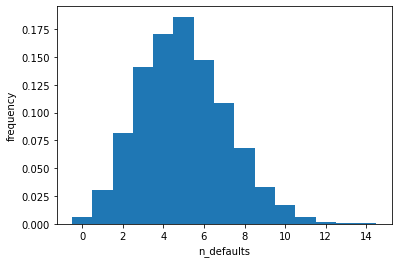

In [11]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
weights = np.ones_like(n_defaults) / float(len(n_defaults))
plt.hist(n_defaults, weights=weights, bins=bins)

# Label axes
plt.xlabel('n_defaults')
plt.ylabel('frequency')


# Show the plot
plt.show()

#Poisson processes and its distribution
>* The Poisson distribution is a limit of the Binomial distribution for rare events. 
>* A good example of Poisson process is the number of no-hitters in the baseball history since it is quite a rare event.  1~2 games per year in average but we may not have it for several years.

In [22]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson: ', np.mean(samples_poisson),  np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [10, 100, 1000, 10000, 100000]
p = [1, 0.1, 0.01, 0.001, 0.0001]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(5):
    samples_binomial = np.random.binomial(n[i], p[i], size = 10000)

    # Print results
    print('Binomial:', np.mean(samples_binomial), np.std(samples_binomial), '(n =', n[i], ')' )

Poisson:  9.9727 3.1795525958851507
Binomial: 10.0 0.0 (n = 10 )
Binomial: 9.9796 2.9846245727059206 (n = 100 )
Binomial: 9.9809 3.147814351260252 (n = 1000 )
Binomial: 9.9798 3.1438180545317826 (n = 10000 )
Binomial: 10.0466 3.18942446845822 (n = 100000 )


In [31]:
# Draw 100,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size = 100000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / len(n_nohitters)

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.00695
